# Importing Libraries

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
import os
for dirname, _, filenames in os.walk('new-plant-diseases-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

new-plant-diseases-dataset\train_model.ipynb
new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Apple___Apple_scab\00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG
new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Apple___Apple_scab\01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG
new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Apple___Apple_scab\01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_270deg.JPG
new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Apple___Apple_scab\01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_90deg.JPG
new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Apple___Apple_scab\01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_new30degFlipLR.J

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Tomato___Early_blight\0034a551-9512-44e5-ba6c-827f85ecc688___RS_Erly.B 9432.JPG
new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Tomato___Early_blight\00c5c908-fc25-4710-a109-db143da23112___RS_Erly.B 7778.JPG
new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Tomato___Early_blight\00e7c4b2-3005-4558-9cfa-235e356cb7a8___RS_Erly.B 7844.JPG
new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Tomato___Early_blight\0114f7b3-7f56-4bef-aa47-7a82da142d4b___RS_Erly.B 7437_180deg.JPG
new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Tomato___Early_blight\0114f7b3-7f56-4bef-aa47-7a82da142d4b___RS_Erly.B 7437_flipTB.JPG
new-plant-diseases-dataset\New Plant Dise

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Test set Image Processing

In [9]:
# Define the full path to the 'valid' directory
valid_directory = "new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

# Create the image dataset from the directory
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)


Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading the Model

In [10]:
import tensorflow as tf

model = tf.keras.models.load_model('trained_model.h5')

# Visualising and Performing Prediction on Single image

In [11]:
import cv2

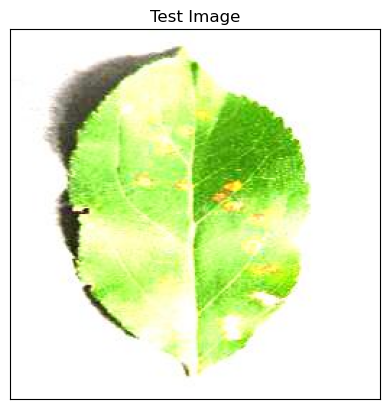

In [12]:
#Test Image Visualization
image_path = 'new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# Testing Model

In [13]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


In [14]:
prediction = model.predict(input_arr)
prediction, prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


(array([[1.13171736e-05, 1.11511554e-07, 9.94831562e-01, 1.74493408e-07,
         5.45476760e-05, 6.07917551e-04, 6.60703892e-09, 1.29272166e-07,
         1.06424096e-08, 3.23828289e-08, 4.48557858e-09, 7.12559950e-06,
         8.33810887e-08, 5.44999409e-07, 2.18717992e-06, 2.74863742e-05,
         1.89115599e-04, 9.14453082e-08, 2.47168908e-04, 5.53692807e-05,
         7.58293410e-08, 1.08088742e-07, 1.70203549e-07, 4.55354302e-06,
         9.02288289e-09, 3.79153875e-07, 5.92430240e-07, 2.77064430e-07,
         1.48987965e-04, 1.19741337e-04, 3.00130137e-04, 1.91263476e-04,
         2.06122844e-04, 1.73726346e-06, 1.26221958e-05, 2.96227750e-03,
         1.58285056e-05, 1.52487871e-07]], dtype=float32),
 (1, 38))

In [15]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


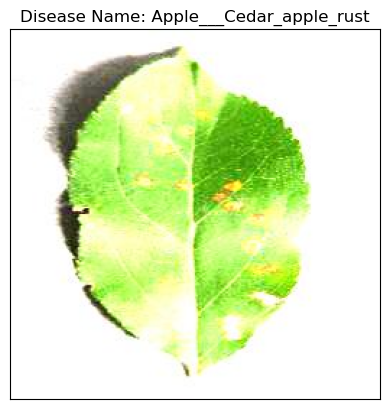

In [16]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [17]:
model_prediction

'Apple___Cedar_apple_rust'